## Normal Modes ##
Code to find normal modes given a temperature and salinity profile

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d

from salishsea_tools import psu_tools

%matplotlib inline

### 1. Read the data and get a density profile on a uniform grid for the whole water column ###

In [4]:
def get_density_profile(filename, bottomdepth, dz):
    
    # get the data, calculate the density
    data = np.loadtxt(filename, skiprows=1, delimiter=',')
    density = psu_tools.calculate_density(data[:,3], data[:,2])
    
    # calculate the interpolation function
    interpolated_density_function = interp1d(data[:,1], density, kind='cubic')

    # set up the depth and density arrays for a uniform grid
    depths = np.arange(0., bottomdepth, dz)
    newdensity = np.zeros_like(depths)
    indexes = range(len(depths))
    
    # interpolate where we have data
    for iz in [goodiz for goodiz in indexes if depths[goodiz] > data[0, 1] and depths[goodiz] < data[-1, 1]]:
        newdensity[iz] = interpolated_density_function(depths[iz])
    
    # set all deeper values to the maximum value
    for iz in [deepiz for deepiz in indexes if depths[deepiz] > data[-1, 1]]:
        newdensity[iz] = newdensity.max()
    
    # linearly extrapolate to the surface
    firstshallow = np.array([shallowiz for shallowiz in indexes if depths[shallowiz] < data[0, 1]]).max()
    for iz in range(firstshallow, -1, -1):
        newdensity[iz] = 2*newdensity[iz+1] - newdensity[iz+2]

    return depths, newdensity

In [5]:
def write_densitydat(depths, newdensity):
    arrayX = np.column_stack((depths, newdensity))
    np.savetxt('density.dat', arrayX)

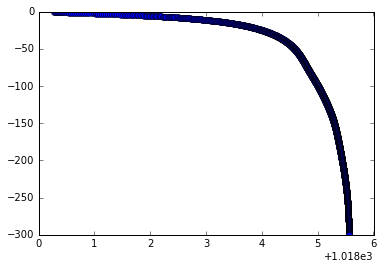

In [6]:
# get the data and find the density
filename = '/data/nsoontie/MEOPAR/analysis-nancy/notebooks/currents/Central_meanTS_20141126_20150426.csv'
bottomdepth = 300
dz = 0.1
depths, newdensity = get_density_profile(filename, bottomdepth, dz)
plt.plot(newdensity, -depths, 'o')

# write the results to a file for the fortran code
write_densitydat(depths, newdensity)

In [1]:
# build the fortran code
!gfortran find_modes.f -o find_modes

In [71]:
# now run the fortran code on the command line until you get a good fit.  Move assign4.dat into std#_mode#.dat file

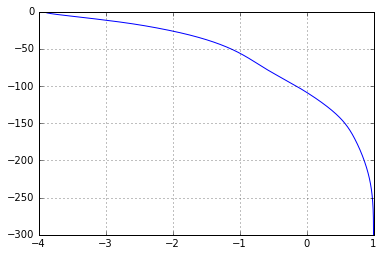

In [10]:
# 7.368 km, mode 1
end = depths.shape[0]
result_central_mode1 = np.loadtxt('Cntr_mode1.dat')
plt.plot(result_central_mode1[:end,1], -result_central_mode1[:end,0])
plt.grid()

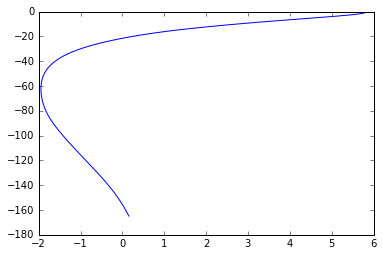

In [21]:
# 4.331 km, mode 2
result_central_mode2 = np.loadtxt('Cntr_mode2.dat')
plt.plot(result_central_mode2[:end,1], -result_central_mode2[:end,0])

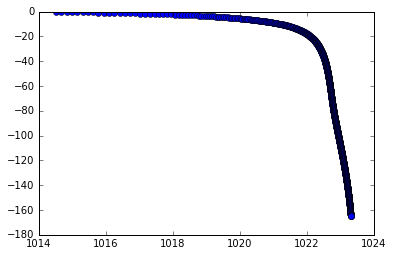

In [13]:
# get the data and find the density
filename = '/data/nsoontie/MEOPAR/analysis-nancy/notebooks/currents/East_meanTS_20141126_20150426.csv'
bottomdepth = 165
dz = 0.1
depths, newdensity = get_density_profile(filename, bottomdepth, dz)
plt.plot(newdensity, -depths, 'o')

# write the results to a file for the fortran code
write_densitydat(depths, newdensity)

In [14]:
# now run the fortran code on the command line until you get a good fit.  Move assign4.dat into std#_mode#.dat file

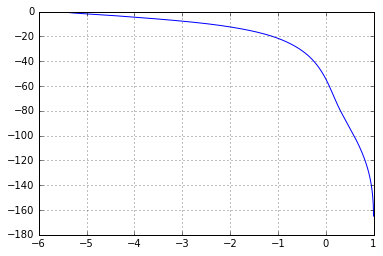

In [16]:
# 5.462 km, mode 1
end = depths.shape[0]
result_east_mode1 = np.loadtxt('East_mode1.dat')
plt.plot(result_east_mode1[:end,1], -result_east_mode1[:end,0])
plt.grid()

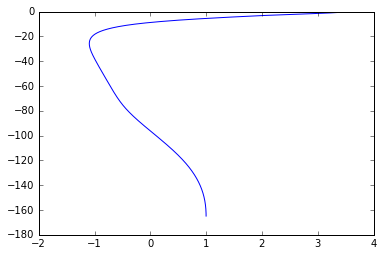

In [25]:
# 3.518 km, mode 2
result_east_mode2 = np.loadtxt('East_mode2.dat')
plt.plot(result_east_mode2[:end,1], -result_east_mode2[:end,0])

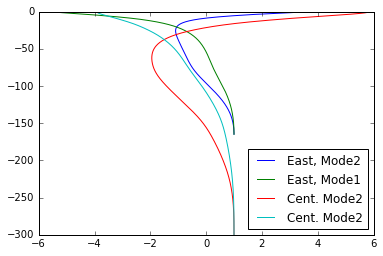

In [33]:
plt.plot(result_east_mode2[:end,1], -result_east_mode2[:end,0], label='East, Mode2')
plt.plot(result_east_mode1[:end,1], -result_east_mode1[:end,0], label='East, Mode1')
plt.plot(result_central_mode2[:3000,1], -result_central_mode2[:3000,0], label='Cent. Mode2')
plt.plot(result_central_mode1[:3000,1], -result_central_mode1[:3000,0], label='Cent. Mode2')
plt.legend(loc='lower right')